# DS 3001 Project Part 1: 
## Wrangling/EDA - Fraud Detection Analysis
#### Goal: Analyze transaction-level data in order to understand the patterns that distinguish fraudulent transactions from legitimate ones and to build a model that can accurately predict fraud before it occurs

In [22]:
# All Imports

import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


### Loading the Dataset
Source: https://www.kaggle.com/datasets/samayashar/fraud-detection-transactions-dataset/data

In [23]:
# Using Kaggle API to download latest file version
path = kagglehub.dataset_download("samayashar/fraud-detection-transactions-dataset")
print("Path to dataset files:", path)

csv_path = f"{path}/synthetic_fraud_dataset.csv" 
df = pd.read_csv(csv_path)
df.head(10)

Path to dataset files: C:\Users\puckh\.cache\kagglehub\datasets\samayashar\fraud-detection-transactions-dataset\versions\1


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
5,TXN_42724,USER_6852,168.55,Online,2023-06-05 20:55:00,33236.94,Laptop,Tokyo,Restaurants,0,...,3,226.85,2,Discover,51,1725.64,OTP,0.0504,0,0
6,TXN_10822,USER_5052,3.79,POS,2023-11-07 01:18:00,86834.18,Tablet,London,Restaurants,0,...,2,298.35,2,Mastercard,168,3757.19,Password,0.0875,0,0
7,TXN_49498,USER_4660,7.08,ATM Withdrawal,2023-02-25 03:43:00,45826.27,Tablet,London,Restaurants,0,...,3,164.38,4,Discover,182,1764.66,Biometric,0.5326,0,1
8,TXN_4144,USER_1584,34.25,ATM Withdrawal,2023-03-09 22:51:00,94392.35,Tablet,Tokyo,Clothing,0,...,7,90.02,3,Visa,24,550.38,Biometric,0.1347,1,0
9,TXN_36958,USER_9498,16.24,POS,2023-09-20 17:27:00,91859.97,Mobile,Mumbai,Travel,0,...,6,474.42,1,Mastercard,124,720.91,PIN,0.3394,0,0


##### Size of the Data

In [24]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 50000, Columns: 21


##### Data Types

In [25]:
print(df.dtypes)

Transaction_ID                   object
User_ID                          object
Transaction_Amount              float64
Transaction_Type                 object
Timestamp                        object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                   int64
Previous_Fraudulent_Activity      int64
Daily_Transaction_Count           int64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d       int64
Card_Type                        object
Card_Age                          int64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                        int64
Fraud_Label                       int64
dtype: object


In [26]:
# Differentiating numeric and cateogrical variables for visualizing 
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if "Fraud_Label" in numeric_cols:  # Removing target variable from numeric
    numeric_cols.remove("Fraud_Label")

### Visualizing the Data

##### Numeric Variables

In [27]:
# --- Summary statistics for numeric columns ---
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,50000.0,99.411012,98.687292,0.0000,28.6775,69.66000,138.852500,1174.14
Account_Balance,50000.0,50294.065981,28760.458557,500.4800,25355.9950,50384.43000,75115.135000,99998.31
IP_Address_Flag,50000.0,0.050200,0.218360,0.0000,0.0000,0.00000,0.000000,1.00
Previous_Fraudulent_Activity,50000.0,0.098400,0.297858,0.0000,0.0000,0.00000,0.000000,1.00
Daily_Transaction_Count,50000.0,7.485240,4.039637,1.0000,4.0000,7.00000,11.000000,14.00
Avg_Transaction_Amount_7d,50000.0,255.271924,141.382279,10.0000,132.0875,256.08500,378.032500,500.00
Failed_Transaction_Count_7d,50000.0,2.003540,1.414273,0.0000,1.0000,2.00000,3.000000,4.00
Card_Age,50000.0,119.999940,68.985817,1.0000,60.0000,120.00000,180.000000,239.00
Transaction_Distance,50000.0,2499.164155,1442.013834,0.2500,1256.4975,2490.78500,3746.395000,4999.93
Risk_Score,50000.0,0.501556,0.287774,0.0001,0.2540,0.50225,0.749525,1.00


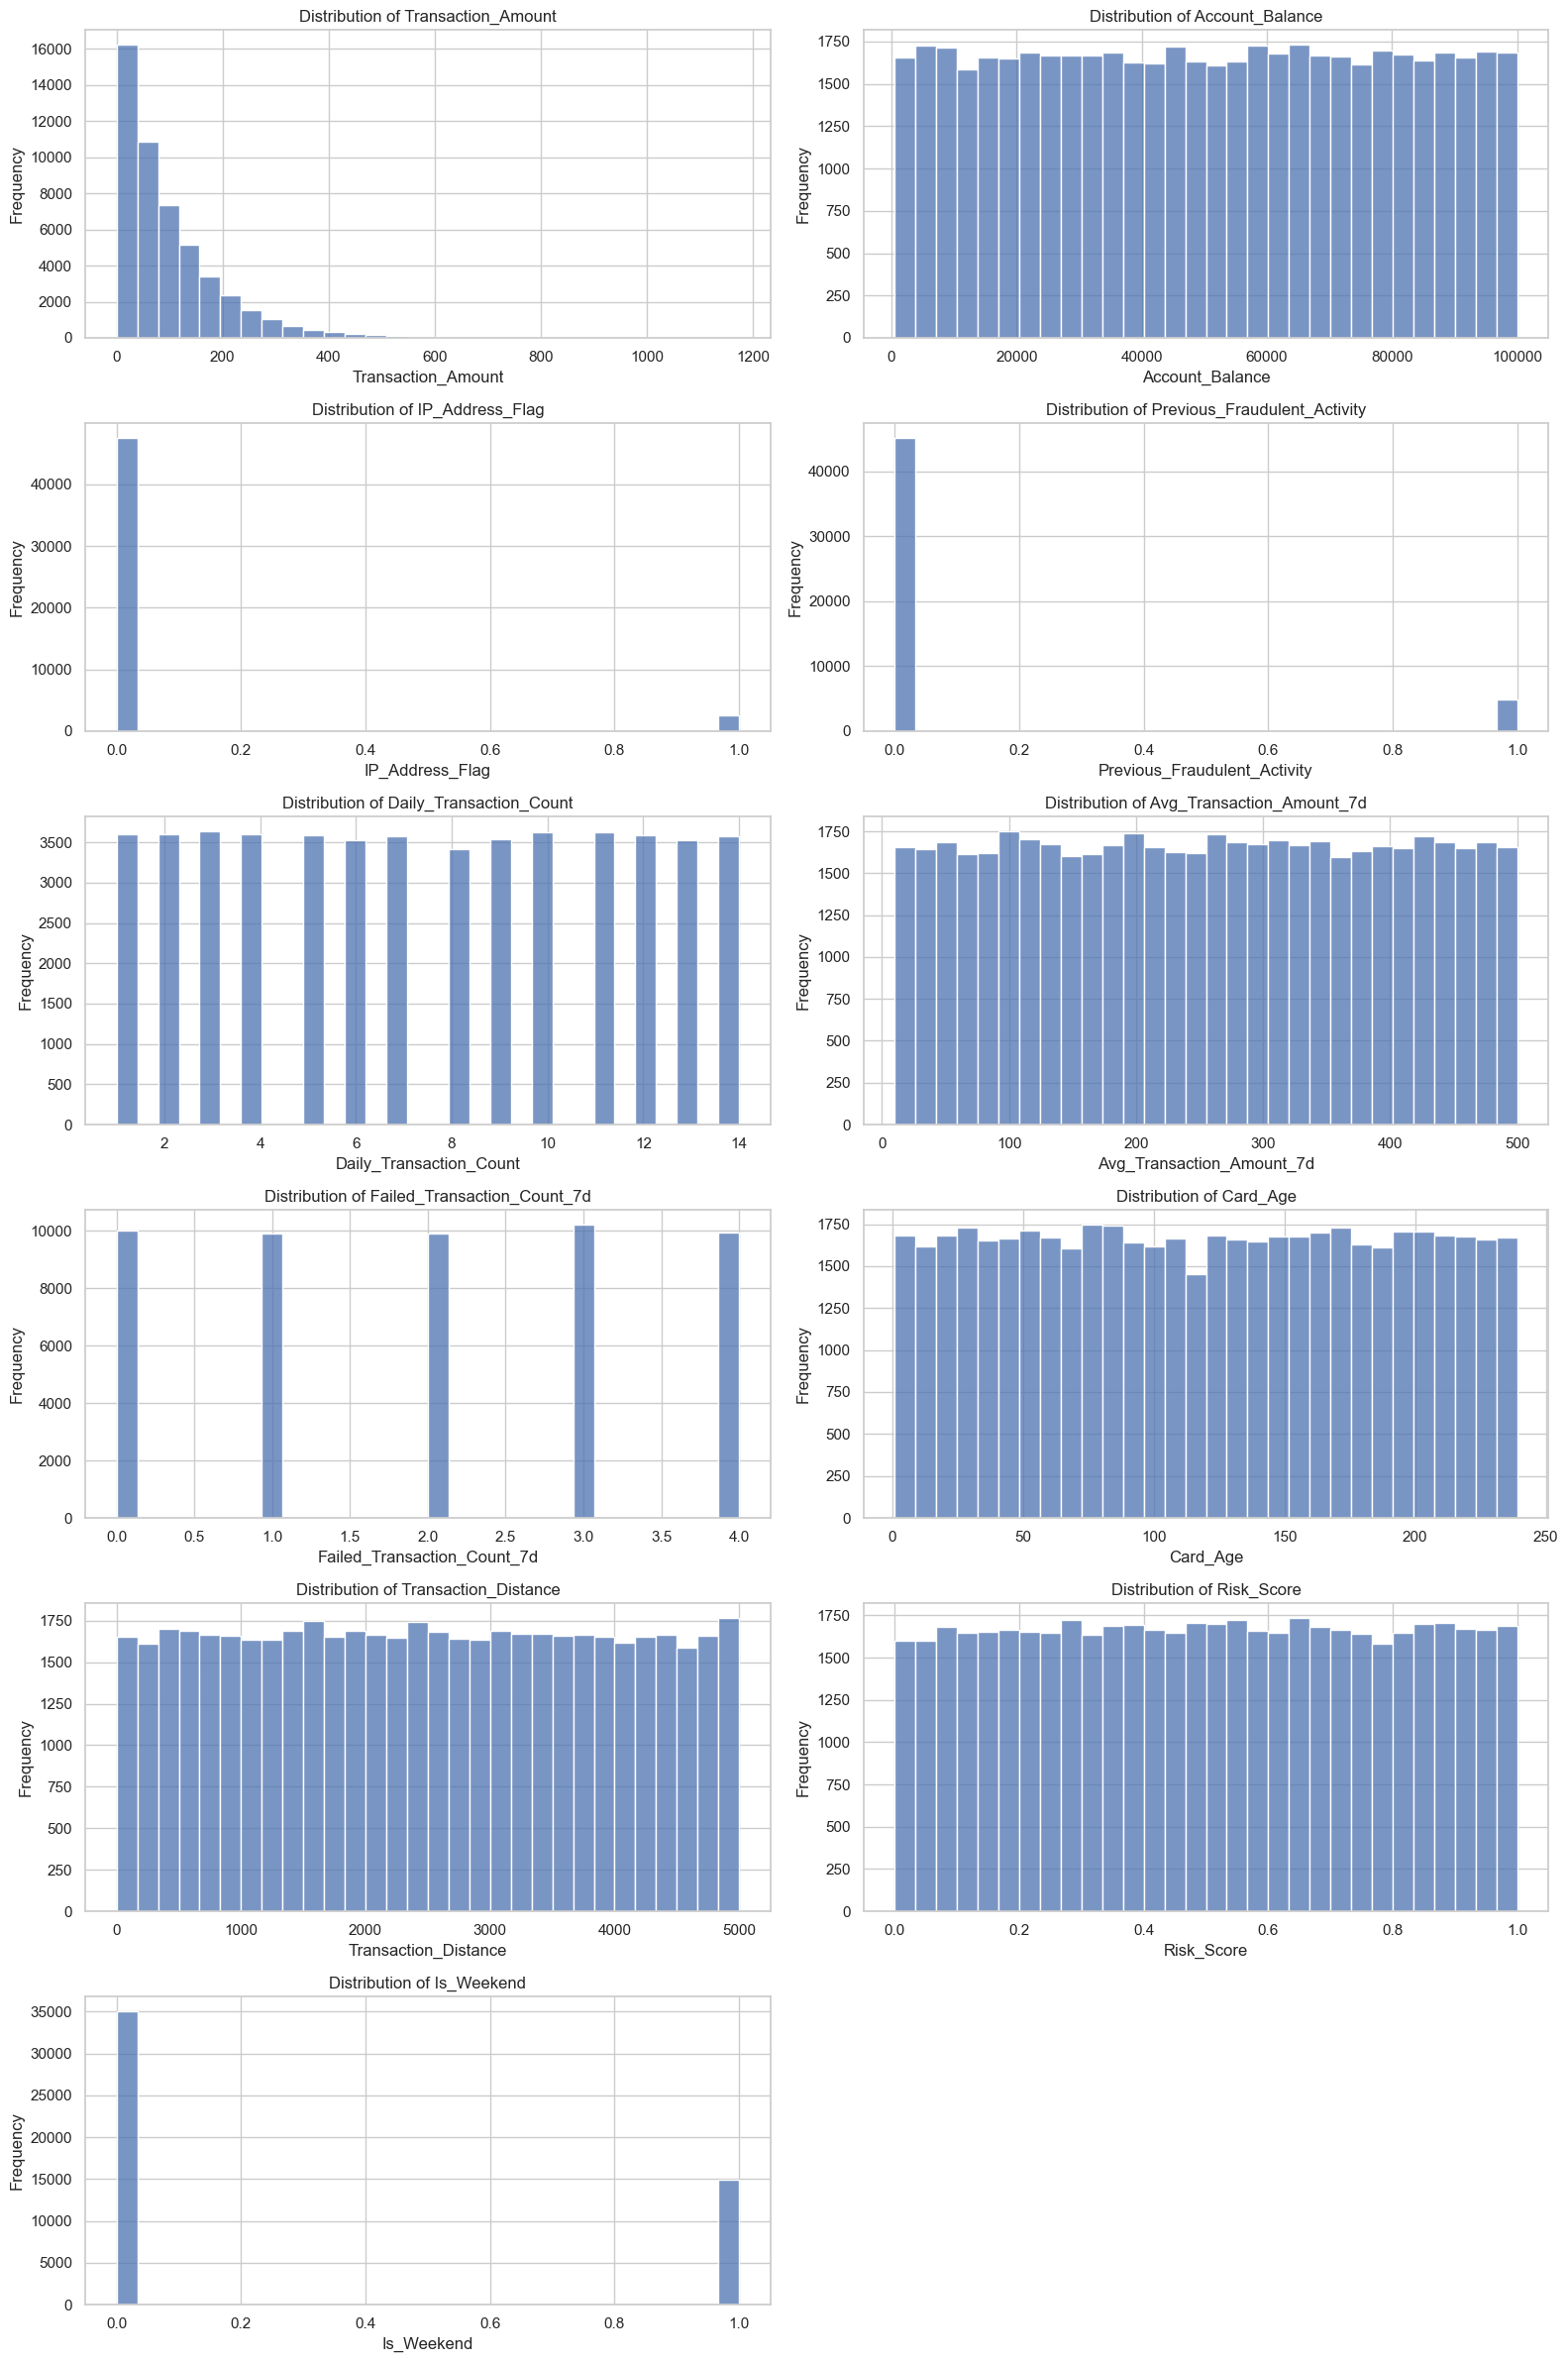

In [28]:
# --- Numeric Variable Distributions ---

n_num = len(numeric_cols)
num_rows = math.ceil(n_num / 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 4 * num_rows))

for i, col in enumerate(numeric_cols):
    ax = axes[i // 2, i % 2]
    sns.histplot(df[col], kde=False, bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

for j in range(i + 1, num_rows * 2):
    fig.delaxes(axes[j // 2, j % 2])

plt.tight_layout()
plt.show()

- Transaction_Amount is right-skewed with a heavy tail. A log transformation (np.log1p(df['Transaction_Amount'])) would help normalize and stabilize variance
- Is_Weekend, IP_Address_Flag, Previous_Fraudulent_Activity are all binary indicators and do not require any transformation
- Risk_Score, Transaction_Distance, Account_Balance, Avg_Transaction_Amount_7d, Card_Age, Daily_Transaction_Count, Failed_Transaction_Count_7d are all relatively uniform across the range

##### Categorical Variables

In [29]:
# --- Summary stats for categorical columns---
df.describe(include='object').T

,count,unique,top,freq
Transaction_ID,50000,50000,TXN_33553,1
User_ID,50000,8963,USER_6599,16
Transaction_Type,50000,4,POS,12549
Timestamp,50000,47724,2023-06-04 06:35:00,4
Device_Type,50000,3,Tablet,16779
Location,50000,5,Tokyo,10208
Merchant_Category,50000,5,Clothing,10033
Card_Type,50000,4,Mastercard,12693
Authentication_Method,50000,4,Biometric,12591


In [30]:
df[categorical_cols].nunique().sort_values(ascending=False)


Transaction_ID           50000
Timestamp                47724
User_ID                   8963
Location                     5
Merchant_Category            5
Transaction_Type             4
Card_Type                    4
Authentication_Method        4
Device_Type                  3
dtype: int64

- Transaction_ID, Timestamp, User_ID all have high-cardinality, making them difficult to visualize/plot

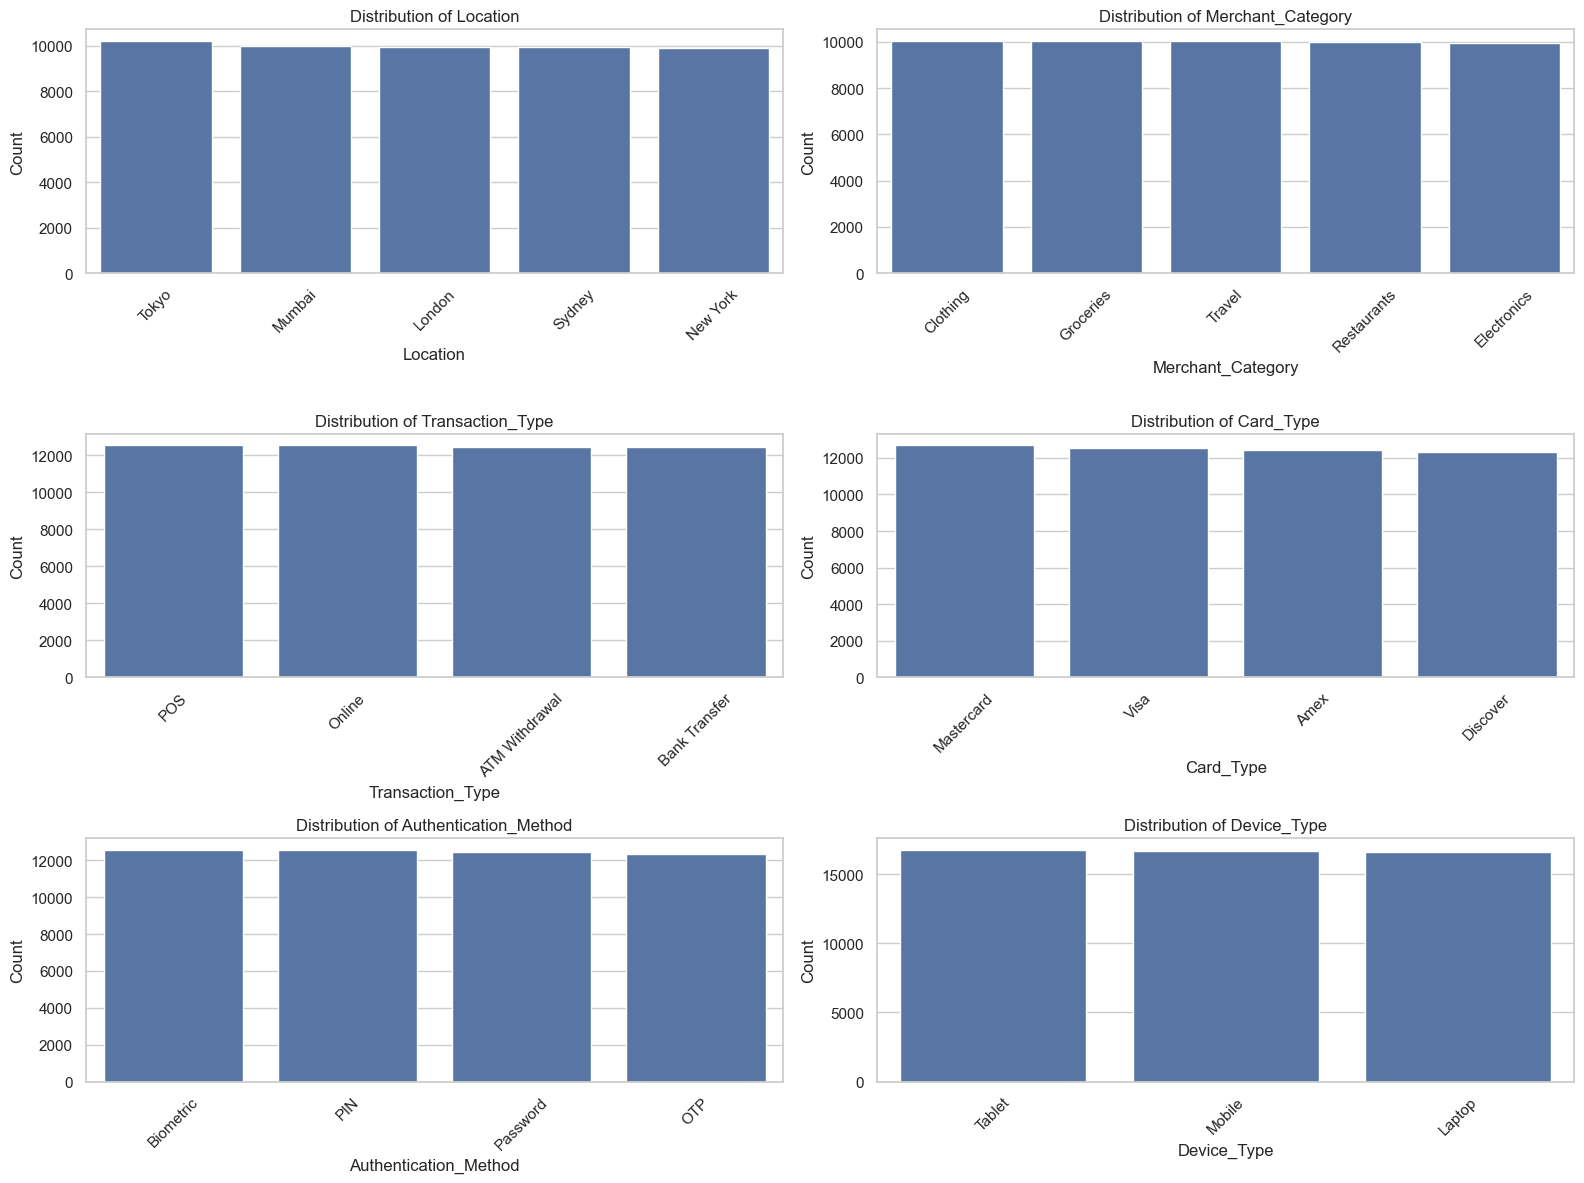

In [31]:
# --- Cateogorical Variable Distributions ---

# Visualizing categorical variables with low cardinality
sns.set(style="whitegrid")

# Low-cardinality categorical columns
selected_cats = [
    "Location",
    "Merchant_Category",
    "Transaction_Type",
    "Card_Type",
    "Authentication_Method",
    "Device_Type"
]

n_cat = len(selected_cats)
cat_rows = math.ceil(n_cat / 2)

fig, axes = plt.subplots(cat_rows, 2, figsize=(16, 4 * cat_rows))
axes = axes.flatten()

for i, col in enumerate(selected_cats):
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- All categorical variables have a uniform distribution

##### Response Variable - Fraud_Label

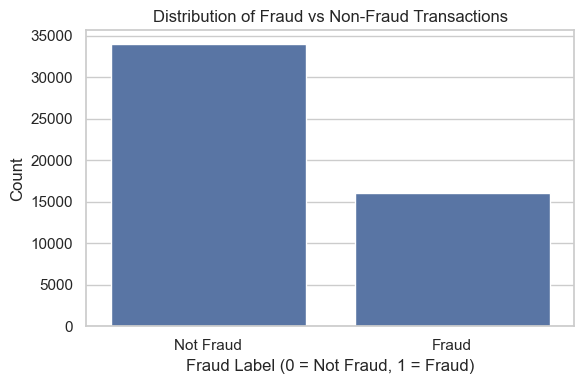

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

sns.countplot(data=df, x="Fraud_Label")
plt.title("Distribution of Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraud Label (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.tight_layout()
plt.show()

- There are more non-fraud cases than fraud with approximately a 70/30 split
- Introduces a class imbalance

### What is in the Data?

- **Transaction_ID:**	Unique identifier for the transaction
- **User_ID:**	Unique identifier for the user involved in the transaction
- **Transaction_Amount:**	Dollar amount of the transaction
- **Transaction_Type:**	Type of transaction (Online, In-Store, ATM, etc.)
- **Timestamp:**	Date and time of the transaction
- **Account_Balance:**	User's current account balance before the transaction
- **Device_Type:**	Device used to initiate the transaction (Mobile, Laptop, etc.)
- **Location:**	Geographical location where the transaction occurred
- **Merchant_Category:**	Category of the merchant (Retail, Food, Travel, etc.)
- **IP_Address_Flag:**	Flag indicating suspicious IP address usage (1 = suspicious, 0 = normal)
- **Previous_Fraudulent_Activity:**	Whether the user has a history of fraud (1 = yes, 0 = no)
- **Daily_Transaction_Count:**	Number of transactions by the user on that day
- **Avg_Transaction_Amount_7d:**	Average transaction amount for the user in the last 7 days
- **Failed_Transaction_Count_7d:**	Number of failed transactions in the past 7 days
- **Card_Type:**	Type of card used (Visa, Mastercard, Amex, etc.)
- **Card_Age:**	Age of the card in months
- **Transaction_Distance:**	Distance between the user's location and the transaction location (km/mi)
- **Authentication_Method:**	Method of authentication (OTP, Password, Biometric, etc.)
- **Risk_Score:**	Model-generated risk score (0 to 1)
- **Is_Weekend:**	Indicates if the transaction happened on a weekend (1 = yes, 0 = no)
- **Fraud_Label:**	Target variable (1 = Fraud, 0 = Not Fraud)

### How will these data be useful for studying the phenomenon you're interested in?

This dataset is highly valuable for studying the patterns and behaviors associated with fraudulent transactions. With a detailed breakdown of user activity, transaction context, and historical indicators, it allows for an in-depth exploration of what makes a transaction more likely to be fraudulent. I'm particularly interested in identifying the key features that differentiate fraud from non-fraud, such as whether unusual transaction amounts, inconsistent locations, or changes in device type are reliable red flags. Understanding these relationships can help surface hidden patterns and improve fraud prevention strategies.

The behavioral aspects of the dataset, including variables like Daily_Transaction_Count, Avg_Transaction_Amount_7d, and Failed_Transaction_Count_7d, give insight into how user activity evolves over time. Anomalies in these behaviors could be early indicators of suspicious intent. Similarly, contextual features like Device_Type, Location, and Authentication_Method add another layer to the analysis, capturing the circumstances under which each transaction occurs.

What makes this dataset especially useful is that it includes a labeled outcome, Fraud_Label, enabling supervised machine learning techniques. This means I can train and evaluate predictive models to identify fraudulent transactions based on patterns in the data. In doing so, I hope to assess which features are most predictive of fraud and how well various models perform. Ultimately, the goal is to better understand what factors contribute most to fraudulent activity and how predictive analytics can be applied to detect and prevent fraud in real-world systems.

### What are the challenges you've resolved or expect to face in using them?

Working with this dataset presents a few notable challenges, some of which I’ve already addressed and others that I expect to encounter as the project progresses. One of the main challenges is dealing with the class imbalance in the target variable, Fraud_Label. Fraudulent transactions make up a smaller portion of the dataset compared to legitimate ones, which can bias predictive models toward favoring the majority class. To address this, I plan to experiment with techniques like class weighting, resampling, and using evaluation metrics like precision, recall, and F1-score that are more informative than accuracy in imbalanced settings.

Another challenge relates to data preprocessing and transformation. Some numerical features in the dataset, such as Transaction_Amount, are heavily skewed. Skewed distributions can impact the performance of machine learning models, so I plan to apply log transformations to normalize them. In contrast, binary and categorical features such as Is_Weekend, IP_Address_Flag, Previous_Fraudulent_Activity, Device_Type, Location, and Authentication_Method require encoding for use in models.

Additionally, I need to be careful about feature selection and leakage. Some variables may be too closely tied to the target or may only be known after the fraud label is determined, which would artificially inflate model performance during training but perform poorly in real-world prediction. I'll need to carefully assess each feature's availability at prediction time and possibly exclude or engineer features to better reflect a live fraud detection scenario.

Finally, there's the broader challenge of interpretability. In fraud detection, it’s important to understand and explain why certain transactions are flagged as suspicious. This is especially true in financial applications, where decisions may be audited or need justification. Therefore, I’m planning to explore feature importance measures to make the model outputs more transparent.